In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:


# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

saint-philippe re
pevek ru
east london za
bambous virieux mu
castro cl
illoqqortoormiut gl
sioux lookout ca
nizhneyansk ru
hithadhoo mv
carlsbad us
brooks ca
puerto ayora ec
deh rawud af
vernon us
rikitea pf
am timan td
ushuaia ar
saskylakh ru
fortuna us
narsaq gl
ushuaia ar
ponta do sol pt
merauke id
atherton au
cap malheureux mu
barentsburg sj
pimenta bueno br
camacha pt
lagoa pt
saint george bm
vaini to
seoul kr
qaqortoq gl
illoqqortoormiut gl
rikitea pf
torbay ca
christchurch nz
albany au
cape town za
kodiak us
ushuaia ar
qaanaaq gl
hermanus za
nangomba tz
camacupa ao
yar-sale ru
rikitea pf
ilulissat gl
port alfred za
jamestown sh
mataura pf
puerto ayora ec
hualmay pe
kavaratti in
rikitea pf
busselton au
weymouth gb
busselton au
rikitea pf
barrow us
saskylakh ru
hermanus za
ushuaia ar
saint anthony ca
taolanaro mg
san lawrenz mt
inhambane mz
umm kaddadah sd
qandala so
roald no
victoria sc
severo-yeniseyskiy ru
dwarka in
dunedin nz
mar del plata ar
katangli ru
scottsbluff us
port el

hermanus za
atambua id
barrow us
buchanan lr
fairbanks us
khatanga ru
hobart au
mataura pf
leningradskiy ru
kaeo nz
vardo no
fort frances ca
attawapiskat ca
kavieng pg
rikitea pf
lisakovsk kz
vaini to
albany au
qaqortoq gl
san jose gt
mwinilunga zm
cape town za
castro cl
ballarat au
mar del plata ar
marcona pe
chicama pe
mataura pf
ponta delgada pt
aksu cn
vaini to
dikson ru
honningsvag no
nanortalik gl
saint george bm
kyra ru
marigot gp
airai pw
vaini to
turukhansk ru
moron mn
borlange se
ushuaia ar
hermanus za
port alfred za
hilo us
new norfolk au
busselton au
sirari tz
chokurdakh ru
abu samrah qa
henties bay na
henties bay na
rikitea pf
albany au
samusu ws
thompson ca
nikolskoye ru
taolanaro mg
narsaq gl
barrow us
utiroa ki
kaitangata nz
barentsburg sj
geraldton au
lompoc us
grand centre ca
rio grande br
puerto ayora ec
hobart au
makakilo city us
atuona pf
torbay ca
port alfred za
daru pg
cape town za
busselton au
mar del plata ar
khromtau kz
hilo us
baykit ru
airai pw
grand river s

cape town za
kavieng pg
taclobo ph
cape town za
qaanaaq gl
qaanaaq gl
rikitea pf
mabaruma gy
kahramanmaras tr
mataura pf
belushya guba ru
ushuaia ar
pasni pk
tuktoyaktuk ca
yulara au
ponta do sol pt
illoqqortoormiut gl
dikson ru
alofi nu
punta arenas cl
albany au
rikitea pf
jamestown sh
kapaa us
kayerkan ru
auce lv
qaanaaq gl
saldanha za
victoria sc
provideniya ru
buqayq sa
bathsheba bb
barentsburg sj
bluff nz
sioux lookout ca
vardo no
illoqqortoormiut gl
ushuaia ar
kodiak us
thompson ca
ancud cl
rikitea pf
lensk ru
georgetown us
rio grande br
kapaa us
attawapiskat ca
geraldton au
bluff nz
bloemfontein za
necochea ar
grand gaube mu
upernavik gl
mataura pf
busselton au
illoqqortoormiut gl
taoudenni ml
bluff nz
huarmey pe
codrington ag
bredasdorp za
te anau nz
cape town za
vaini to
uravakonda in
jamestown sh
tigzirt dz
san patricio mx


In [4]:
# list for cities
cities = []
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    if city not in cities:
        cities.append(city)
len(cities)

585

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [15]:
# Build the basic url for the openweathermap
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saint-philippe
Processing Record 2 of Set 1 | pevek
Processing Record 3 of Set 1 | east london
Processing Record 4 of Set 1 | bambous virieux
Processing Record 5 of Set 1 | castro
Processing Record 6 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 7 of Set 1 | sioux lookout
Processing Record 8 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 9 of Set 1 | hithadhoo
Processing Record 10 of Set 1 | carlsbad
Processing Record 11 of Set 1 | brooks
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | deh rawud
City not found. Skipping...
Processing Record 14 of Set 1 | vernon
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | am timan
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | saskylakh
Processing Record 19 of Set 1 | fortuna
Processing Record 20 of Set 1 | narsaq
Processing Record 21

Processing Record 38 of Set 4 | hobyo
Processing Record 39 of Set 4 | pimentel
Processing Record 40 of Set 4 | hengshui
Processing Record 41 of Set 4 | sertanopolis
Processing Record 42 of Set 4 | sao joao da ponte
Processing Record 43 of Set 4 | anadyr
Processing Record 44 of Set 4 | at-bashi
Processing Record 45 of Set 4 | acapulco
Processing Record 46 of Set 4 | luderitz
Processing Record 47 of Set 4 | port lincoln
Processing Record 48 of Set 4 | juegang
Processing Record 49 of Set 4 | bredasdorp
Processing Record 50 of Set 4 | cidreira
Processing Record 1 of Set 5 | longyearbyen
Processing Record 2 of Set 5 | pacifica
Processing Record 3 of Set 5 | kahului
Processing Record 4 of Set 5 | pangnirtung
Processing Record 5 of Set 5 | ibra
Processing Record 6 of Set 5 | sorland
Processing Record 7 of Set 5 | port hardy
Processing Record 8 of Set 5 | esperance
Processing Record 9 of Set 5 | cayenne
Processing Record 10 of Set 5 | hofn
Processing Record 11 of Set 5 | youghal
Processing Rec

Processing Record 23 of Set 8 | faanui
Processing Record 24 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 25 of Set 8 | merrill
Processing Record 26 of Set 8 | micheweni
Processing Record 27 of Set 8 | quzhou
Processing Record 28 of Set 8 | muzhi
Processing Record 29 of Set 8 | namatanai
Processing Record 30 of Set 8 | chama
Processing Record 31 of Set 8 | dudinka
Processing Record 32 of Set 8 | vondrozo
Processing Record 33 of Set 8 | djibo
Processing Record 34 of Set 8 | elat
Processing Record 35 of Set 8 | lebu
Processing Record 36 of Set 8 | havre
Processing Record 37 of Set 8 | santa isabel
Processing Record 38 of Set 8 | liwale
Processing Record 39 of Set 8 | mahajanga
Processing Record 40 of Set 8 | ha tinh
Processing Record 41 of Set 8 | tukrah
Processing Record 42 of Set 8 | stratonion
Processing Record 43 of Set 8 | saint-joseph
Processing Record 44 of Set 8 | pisco
Processing Record 45 of Set 8 | stornoway
Processing Record 46 of Set 8 | el pedernal
Proce

Processing Record 13 of Set 12 | yamada
Processing Record 14 of Set 12 | wuwei
Processing Record 15 of Set 12 | devonport
Processing Record 16 of Set 12 | ponferrada
Processing Record 17 of Set 12 | sobolevo
Processing Record 18 of Set 12 | pyaozerskiy
Processing Record 19 of Set 12 | gravdal
Processing Record 20 of Set 12 | behbahan
Processing Record 21 of Set 12 | marquette
Processing Record 22 of Set 12 | eirunepe
Processing Record 23 of Set 12 | taclobo
Processing Record 24 of Set 12 | mabaruma
Processing Record 25 of Set 12 | kahramanmaras
Processing Record 26 of Set 12 | pasni
Processing Record 27 of Set 12 | kayerkan
Processing Record 28 of Set 12 | auce
Processing Record 29 of Set 12 | saldanha
Processing Record 30 of Set 12 | lensk
Processing Record 31 of Set 12 | bloemfontein
Processing Record 32 of Set 12 | necochea
Processing Record 33 of Set 12 | grand gaube
Processing Record 34 of Set 12 | uravakonda
Processing Record 35 of Set 12 | tigzirt
-----------------------------
D

In [10]:
len(city_data)

535

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint-Philippe,-21.3585,55.7679,78.39,87,42,11.16,RE,2022-04-18 17:56:47
1,Pevek,69.7008,170.3133,8.13,95,100,5.08,RU,2022-04-18 17:56:48
2,East London,-33.0153,27.9116,65.34,94,75,12.66,ZA,2022-04-18 17:56:49
3,Bambous Virieux,-20.3428,57.7575,79.21,94,75,11.50,MU,2022-04-18 17:56:49
4,Castro,-24.7911,-50.0119,68.27,55,46,4.03,BR,2022-04-18 17:56:42
5,Sioux Lookout,50.1001,-91.9170,30.27,69,75,10.36,CA,2022-04-18 17:56:51
6,Hithadhoo,-0.6000,73.0833,83.52,71,100,2.75,MV,2022-04-18 17:56:52
7,Carlsbad,33.1581,-117.3506,80.35,75,38,3.00,US,2022-04-18 17:56:52
8,Brooks,50.5834,-111.8851,45.03,45,57,11.50,CA,2022-04-18 17:53:47
9,Puerto Ayora,-0.7393,-90.3518,78.76,83,91,8.55,EC,2022-04-18 17:56:53


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saint-Philippe,RE,2022-04-18 17:56:47,-21.3585,55.7679,78.39,87,42,11.16
1,Pevek,RU,2022-04-18 17:56:48,69.7008,170.3133,8.13,95,100,5.08
2,East London,ZA,2022-04-18 17:56:49,-33.0153,27.9116,65.34,94,75,12.66
3,Bambous Virieux,MU,2022-04-18 17:56:49,-20.3428,57.7575,79.21,94,75,11.50
4,Castro,BR,2022-04-18 17:56:42,-24.7911,-50.0119,68.27,55,46,4.03
5,Sioux Lookout,CA,2022-04-18 17:56:51,50.1001,-91.9170,30.27,69,75,10.36
6,Hithadhoo,MV,2022-04-18 17:56:52,-0.6000,73.0833,83.52,71,100,2.75
7,Carlsbad,US,2022-04-18 17:56:52,33.1581,-117.3506,80.35,75,38,3.00
8,Brooks,CA,2022-04-18 17:53:47,50.5834,-111.8851,45.03,45,57,11.50
9,Puerto Ayora,EC,2022-04-18 17:56:53,-0.7393,-90.3518,78.76,83,91,8.55


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

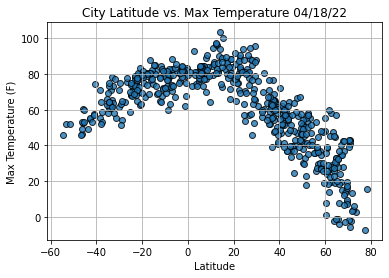

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

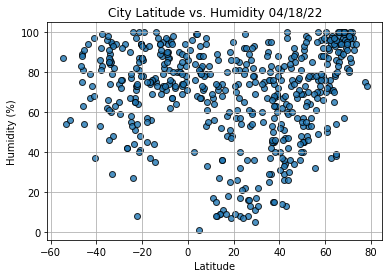

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

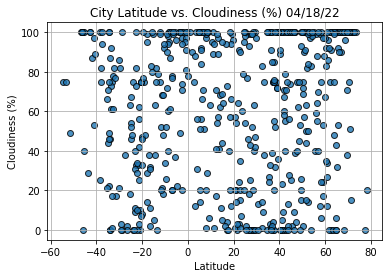

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

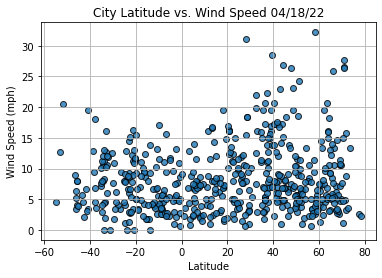

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()